In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../Featre Engineering/New_KDDTrain+.txt')

In [3]:
df.head()

,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,2,2,0.0,0.0,1.00,0.00,150,25,0.17,0.03,0.17,0.05,0.00,11
1,13,1,0.0,0.0,0.08,0.15,255,1,0.00,0.60,0.88,0.00,0.00,11
2,123,6,0.0,0.0,0.05,0.07,255,26,0.10,0.05,0.00,0.00,0.00,9
3,5,5,0.0,0.0,1.00,0.00,30,255,1.00,0.00,0.03,0.00,0.01,11
4,30,32,0.0,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 14 columns):
count                          125973 non-null int64
srv_count                      125973 non-null int64
rerror_rate                    125973 non-null float64
srv_rerror_rate                125973 non-null float64
same_srv_rate                  125973 non-null float64
diff_srv_rate                  125973 non-null float64
dst_host_count                 125973 non-null int64
dst_host_srv_count             125973 non-null int64
dst_host_same_srv_rate         125973 non-null float64
dst_host_diff_srv_rate         125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
dst_host_rerror_rate           125973 non-null float64
dst_host_srv_rerror_rate       125973 non-null float64
labels                         125973 non-null int64
dtypes: float64(9), int64(5)
memory usage: 13.5 MB


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
X = df.drop('labels',axis=1)
y = df['labels']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
#defult n_estimators is 100
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
predicted_labels = rf_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [61]:
print(classification_report(y_test,predicted_labels))
print('\n')
print(accuracy_score(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       310
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         5
           5       0.72      0.52      0.60      1224
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.95      0.97      0.96     13577
          10       0.00      0.00      0.00       512
          11       0.86      0.99      0.92     22193
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        70
          15       0.50      0.00      0.00       954
          16       0.00      0.00      0.00         4
          17       0.93    

/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
np.arange(100,1000,100)

array([100, 200, 300, 400, 500, 600, 700, 800, 900])

In [21]:
#find error rate
err_rate = []

for i in np.arange(100,1000,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    pred_i = rf.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

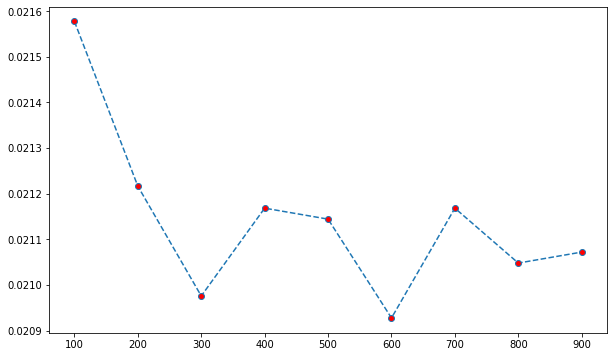

In [27]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(100,1000,100),err_rate,linestyle='dashed',marker='o',markerfacecolor='red')

In [23]:
# So, we try on 600 estimators Let's go..
perfect_model = RandomForestClassifier(n_estimators=600)
perfect_model.fit(X_train,y_train)
predict_labels = perfect_model.predict(X_test)

In [26]:
print(classification_report(y_test,predict_labels))
print('\n')
print(accuracy_score(y_test,predict_labels))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       310
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.94      0.71      0.81        21
           4       1.00      0.60      0.75         5
           5       0.86      0.87      0.86      1224
           6       1.00      0.29      0.44         7
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     13577
          10       0.80      0.73      0.76       512
          11       0.99      0.99      0.99     22193
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.75      0.57      0.65        70
          15       1.00      0.99      0.99       954
          16       0.00      0.00      0.00         4
          17       1.00    

/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
